## Aula 04

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

seed = 4321
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# Armazenando os dados do arquivo .csv em um Dataframe chamado dados
dados = pd.read_csv("dataset/MICRODADOS_ENEM_2019.csv")
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

In [2]:
# Delimitando quais colunas possuem provas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Criando uma coluna no DataFrame contendo a soma das cinco provas
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

In [3]:
# Removendo os inscritos que possuem nota total 0
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

In [4]:
# Prevendo a nota de MT baseada nas outras notas
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

# Criando um DataFrame apenas com as provas, sem valores NaN
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()

# Criando um DataFrame apenas com as colunas da lista provas_entrada
notas_entrada = dados_sem_notas_zero[provas_entrada]

# Criando um DataFrame apenas com o valor contido em provas_saida
notas_saida = dados_sem_notas_zero[prova_saida]

In [5]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [6]:
# Determinando o X (entrada) e o y (saída) do modelo
x = notas_entrada
y = notas_saida 

In [7]:
# Criando a separação entre os dados de teste e os dados de treino (teste com 25% do tamanho)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed)

In [8]:
# Criando e ajustando o modelo LinearSVR
modelo = LinearSVR(random_state=seed)
modelo.fit(x_treino, y_treino)

LinearSVR(random_state=4321)

In [9]:
# Realizando a predição e mostrando a predição dos 5 primeiros elementos
predicoes_matematica = modelo.predict(x_teste)
predicoes_matematica[:5].round(1).tolist()

[420.3, 478.7, 385.7, 459.0, 442.0]

In [10]:
# Mostrando os valores reais para os 5 primeiros elementos (comparação)
y_teste[:5].tolist()

[459.7, 617.2, 520.0, 703.8, 627.1]

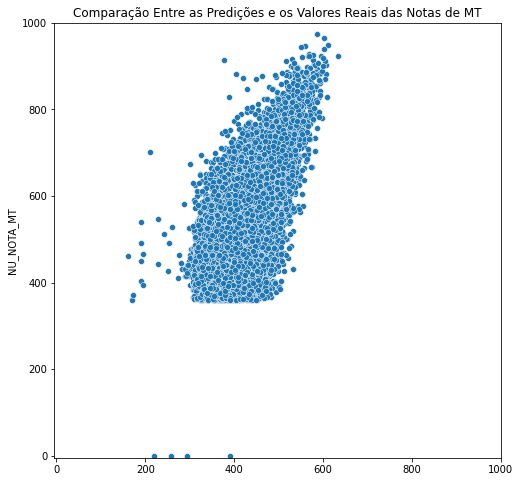

In [11]:
# Plotando um scatterplot para comparar as predições com os valores reais
plt.figure(figsize=(8, 8))
plt.title("Comparação Entre as Predições e os Valores Reais das Notas de MT")
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-5, 1000))
plt.ylim((-5, 1000))

plt.show()

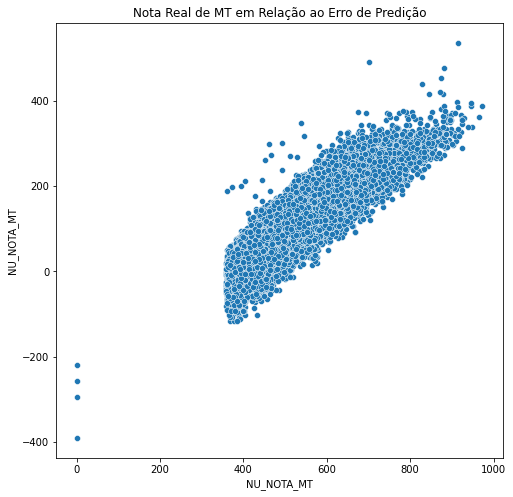

In [12]:
# Plotando um scatterplot evidenciando o erro de predição no eixo Y 
plt.figure(figsize=(8, 8))
plt.title("Nota Real de MT em Relação ao Erro de Predição")
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)

plt.show()

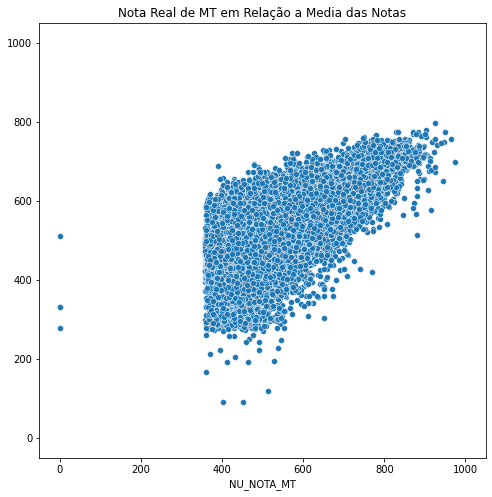

In [13]:
# Plotando um gráfico simulando que a predição seja a média das outras notas
plt.figure(figsize=(8, 8))
plt.title("Nota Real de MT em Relação a Media das Notas")
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))

plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

plt.show()

In [14]:
# Criando um DataFrame para a avaliação dos resultados
resultados = pd.DataFrame()

resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica

# Criando uma coluna com a diferença entre a predição e o valor real
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]

# Criando uma coluna com a diferença entre predição e o valor real ao quadrado (para remover o sinal do erro)
resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [15]:
resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [16]:
# Analisando qual é a média do quadrado da diferença dos resultados
resultados["Quadrado_Diferenca"].mean()

18324.11972400897

In [17]:
# Removendo agora o valor ao quadrado, para apenas possuirmos a diferença sem o sinal
resultados["Quadrado_Diferenca"].mean()**(1/2)

135.36661229420264

In [18]:
# Criando e ajustando o modelo DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)

# Gerando a predição do modelo DummyRegressor
dummy_predicoes = modelo_dummy.predict(x_teste)

In [19]:
# Calculando a média do quadrado da diferença entre a predição e o valor real
print("Dummy Regressor: "+ str(mean_squared_error(y_teste, dummy_predicoes)))

Dummy Regressor: 12063.645588509502


In [20]:
# Calculando a média do quadrado da diferença entre a predição e o valor real
print("LinearSVR: "+ str(mean_squared_error(y_teste, predicoes_matematica)))

LinearSVR: 18324.11972400897


Desafio 1: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

Desafio 2: Ler a documentação do Dummy e alterar o método de regressão.

In [26]:
# Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

# Criando e ajustando o modelo RandomForestRegressor
modelo_random_forest = RandomForestRegressor(random_state=seed)
modelo_random_forest.fit(x_treino, y_treino)

random_forest_predicoes = modelo_random_forest.predict(x_teste)

print("Dummy Regressor: "+ str(round(mean_squared_error(y_teste, dummy_predicoes)**(1/2), 2)))
print("LinearSVR: "+ str(round(mean_squared_error(y_teste, predicoes_matematica)**(1/2), 2)))
print("Random Forest: " +str(round(mean_squared_error(y_teste, random_forest_predicoes)**(1/2), 2)))


Dummy Regressor: 109.83
LinearSVR: 135.37
Random Forest: 76.06


In [32]:
# Desafio 2: Ler a documentação do Dummy e alterar o método de regressão.

modelo_media = DummyRegressor(strategy='mean')
modelo_media.fit(x_treino, y_treino)

dummy_media = modelo_media.predict(x_teste)

modelo_mediana = DummyRegressor(strategy='median')
modelo_mediana.fit(x_treino, y_treino)

dummy_mediana = modelo_mediana.predict(x_teste)

print("Dummy Media: " +str(round(mean_squared_error(y_teste, dummy_media)**(1/2), 2)))
print("Dummy Mediana: " +str(round(mean_squared_error(y_teste, dummy_mediana)**(1/2), 2)))

Dummy Media: 109.83
Dummy Mediana: 112.25
